In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [22]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Night,Holiday,Block,lat,long,Category,DayOfWeek-Monday,...,StreetType-LN,StreetType-DR,StreetType-CT,StreetType-WAY,StreetType-RW,StreetType-PZ,Season-Winter,Season-Fall,Season-Spring,Season-Summer
0,29,11,0,1,0,0,0.584478,-1.557336,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6,8,0,0,1,0.911468,0.775401,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,0,1
2,27,4,6,0,0,1,-2.045603,0.570183,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,1,0
3,1,4,15,0,0,32,1.510611,-0.150875,ASSAULT,0,...,0,0,0,0,0,0,0,0,1,0
4,25,7,16,0,0,0,0.718501,0.532851,ASSAULT,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


### Create and train the Decision Tree 

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X, y)

DecisionTreeClassifier()

In [26]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                  Feature  Importance
0                     Day    0.200225
2                    Hour    0.129768
6                     lat    0.118207
7                    long    0.114995
1                   Month    0.113943
5                   Block    0.037670
9        DayOfWeek-Friday    0.026375
11     DayOfWeek-Thursday    0.025555
13    DayOfWeek-Wednesday    0.025310
12      DayOfWeek-Tuesday    0.024429
14     DayOfWeek-Saturday    0.023939
8        DayOfWeek-Monday    0.022733
10       DayOfWeek-Sunday    0.022042
48          Season-Summer    0.021310
47          Season-Spring    0.019786
46            Season-Fall    0.017879
45          Season-Winter    0.016160
3                   Night    0.010336
21  PdDistrict-TENDERLOIN    0.006882
4                 Holiday    0.006519
29          StreetType-ST    0.003151
32          StreetType-AV    0.002905
17    PdDistrict-NORTHERN    0.001493
15     PdDistrict-MISSION    0.001232
16    PdDistrict-SOUTHERN    0.000770
22        Pd

## Evaluation

### Accuracy on **train dataset**

In [27]:
y_train_pred = model.predict(X)

accuracy = accuracy_score(y, y_train_pred)
print(f"Accuracy for train dataset: {accuracy}")

Accuracy for train dataset: 0.8666149150307585


### Accuracy

# Predict on the test data
y_pred = model.predict(x_test)

In [28]:
# Make predictions
y_pred = model.predict(x_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.23226467741017026


### Precision and Recall per class

In [30]:
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)
f1_scores = f1_score(y_test, y_pred, average=None)

# Round scores
precision_scores = [round(score, 2) for score in precision_scores]
recall_scores = [round(score, 2) for score in recall_scores]
f1_scores = [round(score, 2) for score in f1_scores]

classes = model.classes_

precision_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
})

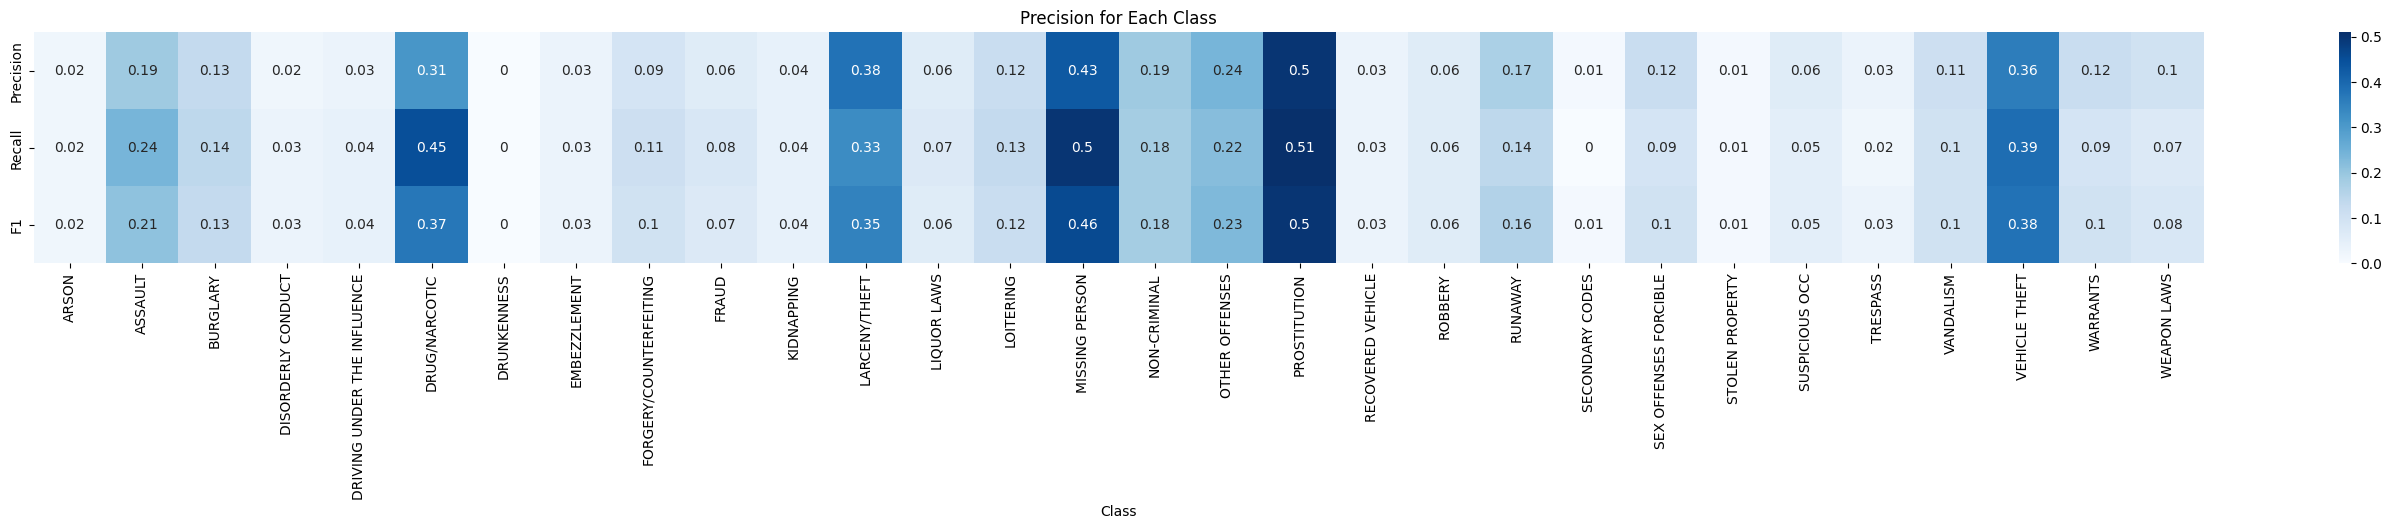

In [31]:
# Plot the DataFrame as a heatmap
plt.figure(figsize=(35, 3))
sns.heatmap(precision_df.set_index('Class').T, annot=True, cmap="Blues")
plt.title('Precision for Each Class')
plt.show()

### Precision / Recall Average

In [32]:
precision_avg = precision_score(y_test, y_pred, average='weighted')
recall_avg = recall_score(y_test, y_pred, average='weighted')
f1_avg = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted average for precision: {round(precision_avg, 2)}")
print(f"Weighted average for recall: {round(recall_avg, 2)}")
print(f"Weighted average for f1: {round(f1_avg, 2)}")

Weighted average for precision: 0.23
Weighted average for recall: 0.23
Weighted average for f1: 0.23


### Log Loss

In [33]:
y_pred_proba = model.predict_proba(x_test)

In [34]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

df = pd.DataFrame(y_pred_proba, columns=model.classes_)
df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 26.803996677175068


### Normalized Confusion Matrix

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)

<Axes: xlabel='Predicted', ylabel='Actual'>

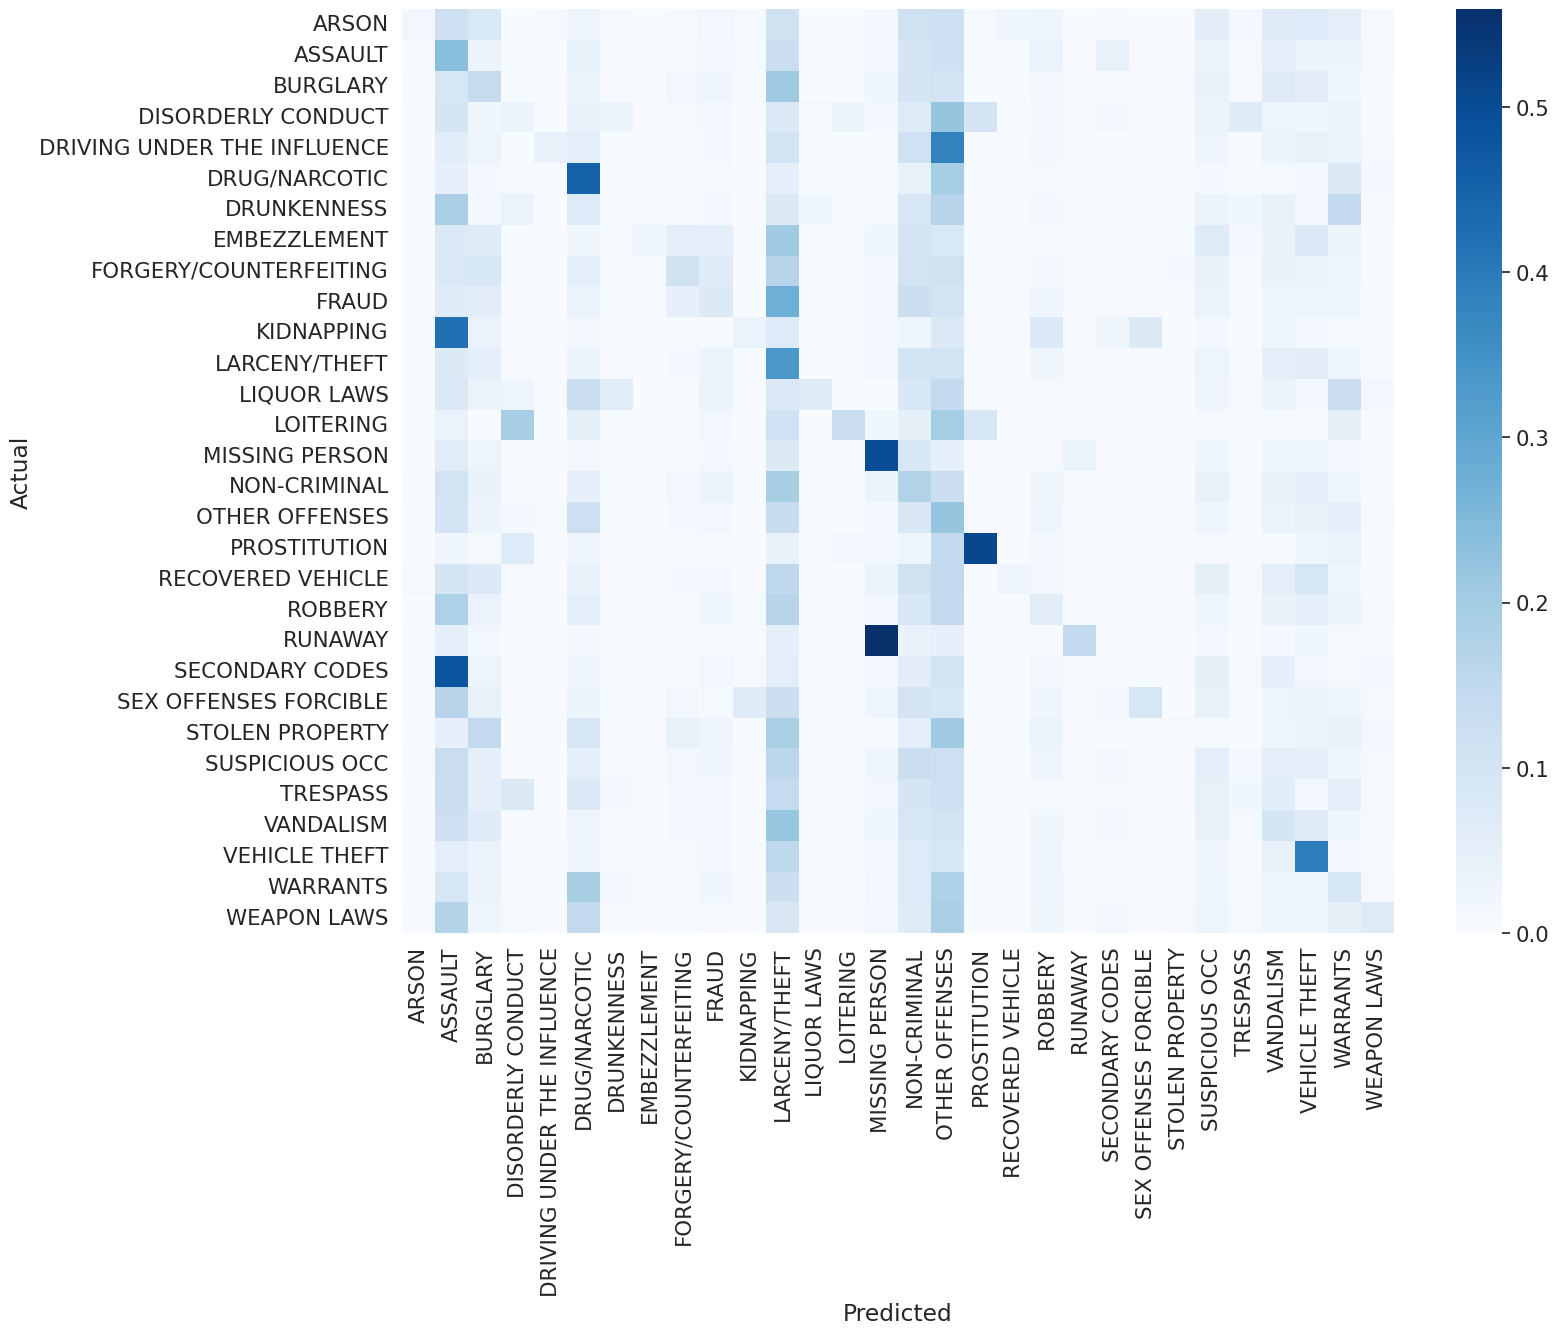

In [36]:
cnf_normalized = cnf_matrix / np.sum(cnf_matrix, axis=1).reshape(-1,1)


df_cm = pd.DataFrame(cnf_normalized, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4)  # for label size

# Plot the normalized confusion matrix
sns.heatmap(df_cm, cbar=True, cmap= "Blues", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

In [37]:
# Save the model
joblib.dump(model, 'models/decision_tree/decision_tree.pkl')

['models/decision_tree/decision_tree.pkl']